In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dfpatients = pd.read_csv('patients.csv')
dfservices = pd.read_csv('services_weekly.csv')
dfedt = pd.read_csv('staff_schedule.csv')                        ## Affichage des différents tableaux pour obtenir une vue globale. 
dfstaff = pd.read_csv('staff.csv')
dfstaff

,staff_id,staff_name,role,service
0,STF-5ca26577,Allison Hill,doctor,emergency
1,STF-02ae59ca,Noah Rhodes,doctor,emergency
2,STF-d8006e7c,Angie Henderson,doctor,emergency
3,STF-212d8b31,Daniel Wagner,doctor,emergency
4,STF-107a58e4,Cristian Santos,doctor,emergency
...,...,...,...,...
105,STF-2c8a995d,Marc Moore,nursing_assistant,ICU
106,STF-251c7770,Sharon Cherry,nursing_assistant,ICU
107,STF-3fb56209,Sierra Johnson,nursing_assistant,ICU
108,STF-a8c30e00,Evelyn Galvan,nursing_assistant,ICU


In [ ]:
dfedt

,week,staff_id,staff_name,role,service,present
0,1,STF-b77cdc60,Allison Hill,doctor,emergency,1
1,2,STF-b77cdc60,Allison Hill,doctor,emergency,1
2,3,STF-b77cdc60,Allison Hill,doctor,emergency,0
3,4,STF-b77cdc60,Allison Hill,doctor,emergency,1
4,5,STF-b77cdc60,Allison Hill,doctor,emergency,1
...,...,...,...,...,...,...
6547,48,STF-302eb752,Erin Edwards,nursing_assistant,ICU,0
6548,49,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1
6549,50,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1
6550,51,STF-302eb752,Erin Edwards,nursing_assistant,ICU,0


In [ ]:
dfservices

,week,month,service,available_beds,patients_request,patients_admitted,patients_refused,patient_satisfaction,staff_morale,event
0,1,1,emergency,32,76,32,44,67,70,none
1,1,1,surgery,45,130,45,85,83,78,flu
2,1,1,general_medicine,37,201,37,164,97,43,flu
3,1,1,ICU,22,31,22,9,84,91,flu
4,2,1,emergency,28,169,28,141,75,64,none
...,...,...,...,...,...,...,...,...,...,...
203,51,12,ICU,18,15,15,0,87,80,none
204,52,12,emergency,26,130,26,104,88,63,none
205,52,12,surgery,53,39,39,0,82,50,none
206,52,12,general_medicine,65,225,65,160,82,40,flu


In [ ]:
dfpatients

,patient_id,name,age,arrival_date,departure_date,service,satisfaction
0,PAT-09484753,Richard Rodriguez,24,2025-03-16,2025-03-22,surgery,61
1,PAT-f0644084,Shannon Walker,6,2025-12-13,2025-12-14,surgery,83
2,PAT-ac6162e4,Julia Torres,24,2025-06-29,2025-07-05,general_medicine,83
3,PAT-3dda2bb5,Crystal Johnson,32,2025-10-12,2025-10-23,emergency,81
4,PAT-08591375,Garrett Lin,25,2025-02-18,2025-02-25,ICU,76
...,...,...,...,...,...,...,...
995,PAT-a01bf534,Amber Vang,26,2025-12-02,2025-12-04,emergency,91
996,PAT-87fa07bd,Martha Smith,89,2025-11-18,2025-11-30,emergency,99
997,PAT-8f07e894,Jennifer James,72,2025-12-12,2025-12-21,ICU,69
998,PAT-4ae301e1,Kara Hernandez,47,2025-02-08,2025-02-20,ICU,61


In [ ]:
#dfservices.event.unique()
dfservices['patient_satisfaction'].isna().unique()     # on vérifie que toutes les données de satisfaction patient sont renseignées

array([False])

,satisfaction
service,
ICU,79.921162
emergency,79.547529
general_medicine,78.574380
surgery,80.314961


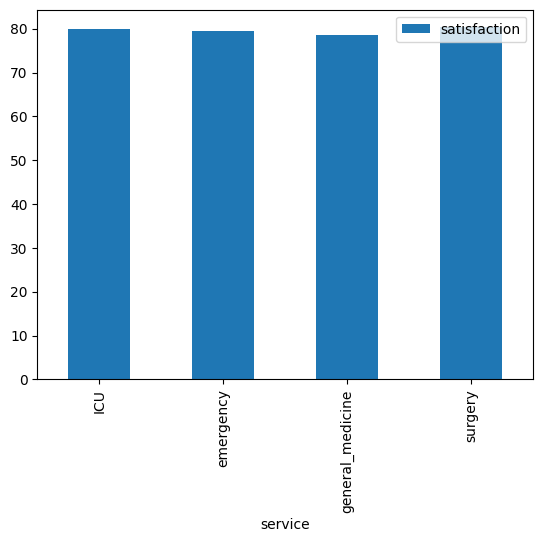

In [ ]:
# satisafaction patient par secteur

df_pat2 = dfpatients[['service','satisfaction']].groupby(by = 'service').mean()       # On regroupe les données de satisfaction par secteur puis on moyenne
df_pat3 = df_pat2
df_pat3.plot.bar()

df_pat3.describe()
df_pat3
# CL : faible variabilité de la satisfaction des patients par secteur, moins'bon' secteur = médecine générale, 
#celui avec le plus de satisafaction = chirurgie



,staff_morale,patient_satisfaction
service,,
ICU,70.980769,81.615385
emergency,73.557692,77.884615
general_medicine,73.096154,81.230769
surgery,72.634615,79.269231


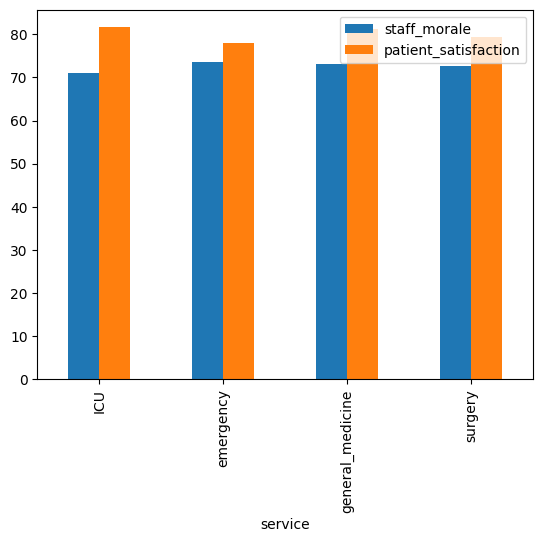

In [ ]:
# moral moyen du personnel par secteur
df_mormoy = dfservices[['service','staff_morale','patient_satisfaction']].groupby(by = 'service').mean()  # on regroupe les valeurs de moral du personnel  
df_mormoy.plot.bar()   # et de satisfaction patient par secteur puis on moyenne
df_mormoy.describe()                                  
df_mormoy
## Cl : un service avec un moral plus bas : ICU , autres services moral plutôt proche au sein du personnel


surgery        satisfaction
count    254.000000
mean      80.314961
std       11.691489
min       60.000000
25%       71.000000
50%       80.000000
75%       90.750000
max       99.000000
general_medicine        satisfaction
count    242.000000
mean      78.574380
std       11.125307
min       60.000000
25%       69.000000
50%       78.000000
75%       88.000000
max       99.000000
emergency        satisfaction
count    263.000000
mean      79.547529
std       11.635225
min       60.000000
25%       70.000000
50%       80.000000
75%       89.000000
max       99.000000
ICU        satisfaction
count    241.000000
mean      79.921162
std       11.723463
min       60.000000
25%       69.000000
50%       81.000000
75%       90.000000
max       99.000000


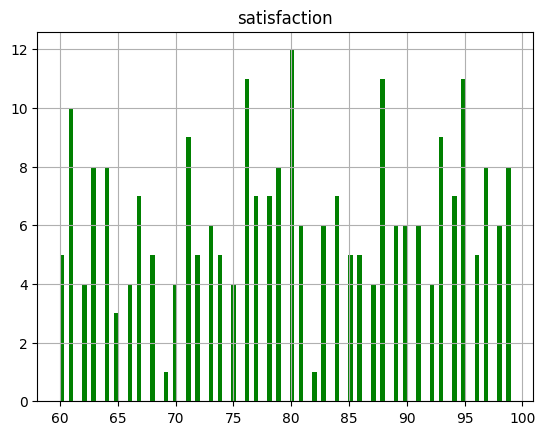

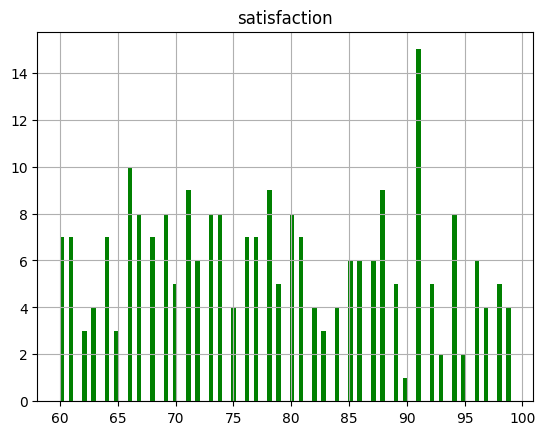

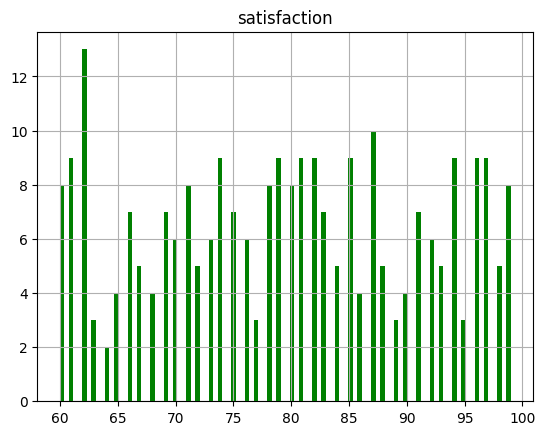

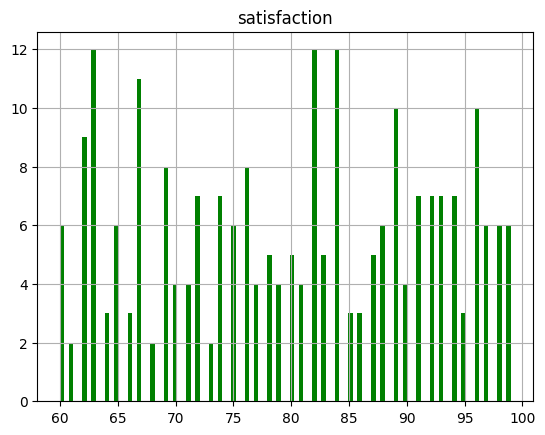

In [ ]:
# Ces données sont-elles représentatives ? Qu'en est-il de l'écart type pour la satisfaction des patients et du moral des travailleurs ?
# Analyse statistique pour chaque secteur du moral du personnel et de la satisfaction patients
liste_val = dfpatients['service'].unique()
dico_tab={}
df_trav = dfpatients[['service','satisfaction']]

for i in liste_val : 
    masque = (df_trav['service'] == i)    ## Pour chaque service, on compte le nombre de personnes avec les mêmes notes de satisfaction
    print(i,df_trav[masque].describe())
    df_trav[masque].hist('satisfaction',bins = 100,color = 'green',label = i)

## interprétation : ...

In [ ]:
# description du personnel pour chaque secteur
df_persect = dfedt[['service','role','staff_name']]
liste_service = df_persect['service'].unique()

for i in liste_service:
    masque = (df_persect['service'] == i)       # On filtre les données par secteur puis on compte le nombre de personnes occupant chaque rôle dans un service
    df_rgserv = df_persect[masque]
    print(i,df_rgserv.groupby(by = 'role')['staff_name'].nunique())

emergency role
doctor                8
nurse                22
nursing_assistant     9
Name: staff_name, dtype: int64
surgery role
doctor                3
nurse                16
nursing_assistant     6
Name: staff_name, dtype: int64
general_medicine role
doctor                5
nurse                16
nursing_assistant     7
Name: staff_name, dtype: int64
ICU role
doctor                6
nurse                19
nursing_assistant     9
Name: staff_name, dtype: int64


C:\Users\alleg\AppData\Local\Temp\ipykernel_22032\588015914.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taux['taux_admis'] = df_taux['patients_admitted']/df_taux['patients_request']
C:\Users\alleg\AppData\Local\Temp\ipykernel_22032\588015914.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_taux['taux_refus'] = df_taux['patients_refused']/df_taux['patients_request']


,week,service,patients_request,patients_admitted,patients_refused,taux_admis,taux_refus
0,1,emergency,76,32,44,0.421053,0.578947
1,1,surgery,130,45,85,0.346154,0.653846
2,1,general_medicine,201,37,164,0.184080,0.815920
3,1,ICU,31,22,9,0.709677,0.290323
4,2,emergency,169,28,141,0.165680,0.834320
...,...,...,...,...,...,...,...
203,51,ICU,15,15,0,1.000000,0.000000
204,52,emergency,130,26,104,0.200000,0.800000
205,52,surgery,39,39,0,1.000000,0.000000
206,52,general_medicine,225,65,160,0.288889,0.711111


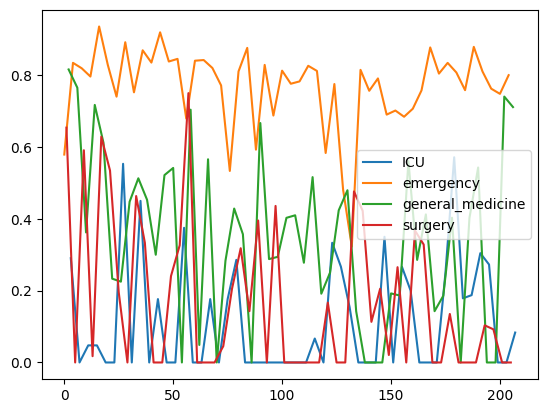

In [ ]:
## Taux de refus par secteur au cours du temps
# groupby plot...
df_taux = dfservices[['week','service','patients_request','patients_admitted','patients_refused']]
df_taux['taux_admis'] = df_taux['patients_admitted']/df_taux['patients_request']
df_taux['taux_refus'] = df_taux['patients_refused']/df_taux['patients_request']
dict_coul = {'ICU' : 'blue','emergency':'green','general_medecine':'red','surgery':'orange'}
df_taux.groupby(by='service')['taux_refus'].plot(x = 'week',legend = True)
df_taux

# rajouter subplots = True pour des raisons de lisibilité
df_taux.groupby(by='service').plot(x = 'week',y = 'taux_refus',label = 'service')  ## Ajouter un titre pour services

C:\Users\alleg\AppData\Local\Temp\ipykernel_22032\939810287.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_stat_age_3 = dfpatients[['categories_age','name']].groupby(by = 'categories_age').count()


<Axes: xlabel='categories_age', ylabel="Nombre d'admis">

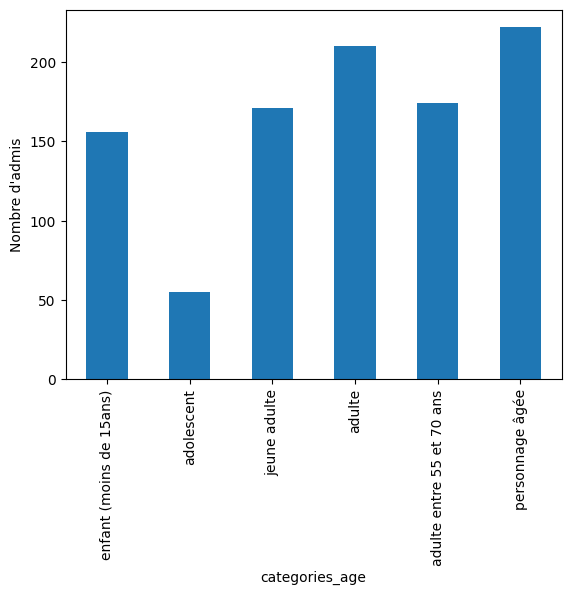

In [ ]:
## Nombre d'entrées par tranche d'âge 0-15,15-19,20-35,36-55,56-70,>70
df_stat_age = pd.cut(dfpatients.age,bins = [0,15,20,35,55,70,max(dfpatients.age)],labels = ['enfant (moins de 15ans)', 'adolescent',
                                                                                            'jeune adulte','adulte',
                                                                                            'adulte entre 55 et 70 ans','personnage âgée'])
df_stat_age2=pd.DataFrame(df_stat_age)
df_stat_age2.columns = ['categories_age']
dfpatients['categories_age'] = df_stat_age2['categories_age']
df_stat_age_3 = dfpatients[['categories_age','name']].groupby(by = 'categories_age').count()
df_stat_age_3.plot.bar(ylabel = "Nombre d'admis",legend = False)

C:\Users\alleg\AppData\Local\Temp\ipykernel_22032\3871326571.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tpsmoy = dfpatients[['categories_age','duree_hosp']].groupby(by = 'categories_age').mean()  # On regroupe par catégorie d'âge puis on moyenne la durée


,duree_hosp
categories_age,
enfant (moins de 15ans),7 days 12:09:13.846153846
adolescent,8 days 04:48:00
jeune adulte,7 days 09:57:53.684210526
adulte,7 days 05:22:17.142857142
adulte entre 55 et 70 ans,7 days 03:35:10.344827586
personnage âgée,7 days 09:24:19.459459459


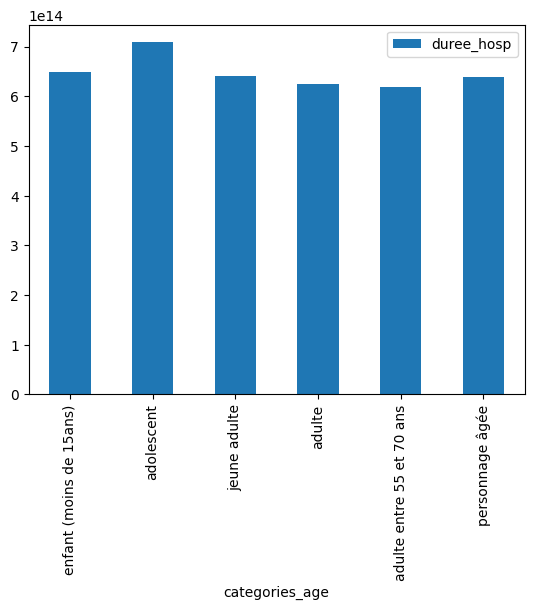

In [ ]:
## Durée d'hospitalisation moyenne par tranche d'âge

dfpatients['arrival_date'] = pd.to_datetime(dfpatients['arrival_date'],format = '%Y-%m-%d')
dfpatients['departure_date'] = pd.to_datetime(dfpatients['departure_date'],format = '%Y-%m-%d')
dfpatients['duree_hosp'] = dfpatients['departure_date'] - dfpatients['arrival_date']   # On crée une colonne durée en soustrayant date de départ et d'arrivée
df_tpsmoy = dfpatients[['categories_age','duree_hosp']].groupby(by = 'categories_age').mean()  # On regroupe par catégorie d'âge puis on moyenne la durée
df_tpsmoy.plot.bar()
df_tpsmoy                                     

,present
role,
doctor,0.591783
nurse,0.601159
nursing_assistant,0.602357


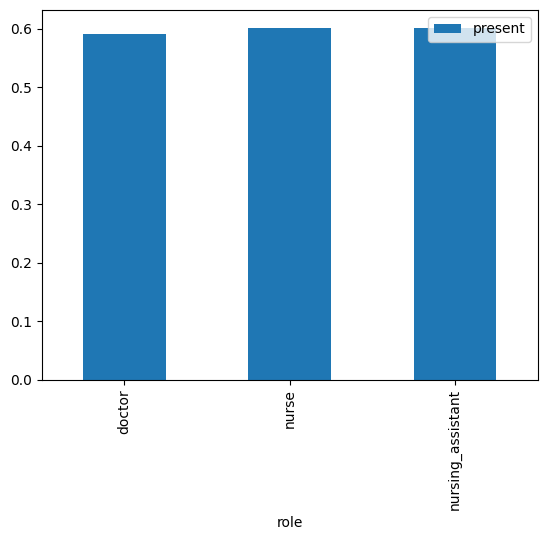

In [ ]:
## Taux de présence de chaque membre du personnel:

nb_week = int(dfedt.week.max())
df_pres = dfedt[['staff_name','present']].groupby(by = 'staff_name').sum()/nb_week  # On calcul les taux de présence de chaque membre du personnel
df_recap =df_pres.merge(dfedt[['staff_id','staff_name','role']], on = 'staff_name',how = 'left')
df_final = df_recap.drop_duplicates()                             
df_final
df_pres_sect = df_final[['present','role']].groupby(by = 'role').mean()  # On regroupe les résultats par role et on moyenne les taux de présence.
df_pres_sect.plot.bar()                                  
df_pres_sect

In [ ]:
dfedt

,week,staff_id,staff_name,role,service,present
0,1,STF-b77cdc60,Allison Hill,doctor,emergency,1
1,2,STF-b77cdc60,Allison Hill,doctor,emergency,1
2,3,STF-b77cdc60,Allison Hill,doctor,emergency,0
3,4,STF-b77cdc60,Allison Hill,doctor,emergency,1
4,5,STF-b77cdc60,Allison Hill,doctor,emergency,1
...,...,...,...,...,...,...
6547,48,STF-302eb752,Erin Edwards,nursing_assistant,ICU,0
6548,49,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1
6549,50,STF-302eb752,Erin Edwards,nursing_assistant,ICU,1
6550,51,STF-302eb752,Erin Edwards,nursing_assistant,ICU,0


<Axes: xlabel='week'>

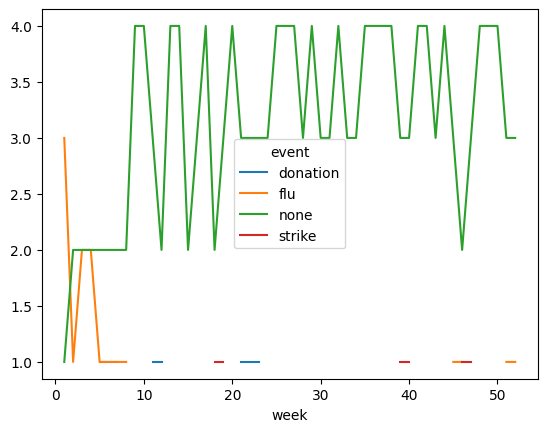

In [ ]:
# Evénements au cours du temps
df_event = dfservices[['week','event','month']].groupby(by=['week','event']).size()
df_event.unstack('event').plot()



In [ ]:
df_moissem = dfservices[['week','month','event']].groupby(['month','week']).count()
df_moissem

event
month week       
1     1         4
      2         4
      3         4
      4         4
2     5         4
      6         4
      7         4
      8         4
3     9         4
      10        4
      11        4
      12        4
4     13        4
      14        4
      15        4
      16        4
5     17        4
      18        4
      19        4
      20        4
6     21        4
      22        4
      23        4
      24        4
7     25        4
      26        4
      27        4
      28        4
8     29        4
      30        4
      31        4
      32        4
9     33        4
      34        4
      35        4
      36        4
10    37        4
      38        4
      39        4
      40        4
11    41        4
      42        4
      43        4
      44        4
12    45        4
      46        4
      47        4
      48        4
      49        4
      50        4
      51        4
      52        4